# YouTube Spam Comments Dataset Analysis

This notebook analyzes the YouTube spam comments dataset containing comments from five different videos (Psy, Katy Perry, LMFAO, Eminem, and Shakira).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for visualizations
plt.style.use('default')
sns.set_palette('husl')

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Project root directory
DATASETS_DIR = Path('../datasets/raw/youtube_spam_data')

## 1. Data Loading and Initial Exploration

In [7]:
# Read all YouTube spam datasets
youtube_files = list(DATASETS_DIR.glob('*.csv'))
youtube_dfs = []

for file in youtube_files:
    df = pd.read_csv(file)
    df['video'] = file.stem  # Add source video name
    youtube_dfs.append(df)

youtube_df = pd.concat(youtube_dfs, ignore_index=True)

# Display basic information
print("Dataset Overview:")
print("-" * 50)
print(f"Total number of comments: {len(youtube_df)}")
print("\nColumns:")
youtube_df.info()

Dataset Overview:
--------------------------------------------------
Total number of comments: 1956

Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
 5   video       1956 non-null   object
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [12]:
youtube_df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,video,text_length
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,Youtube01-Psy,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,Youtube01-Psy,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,Youtube01-Psy,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Youtube01-Psy,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Youtube01-Psy,39


## 2. Data Distribution Analysis

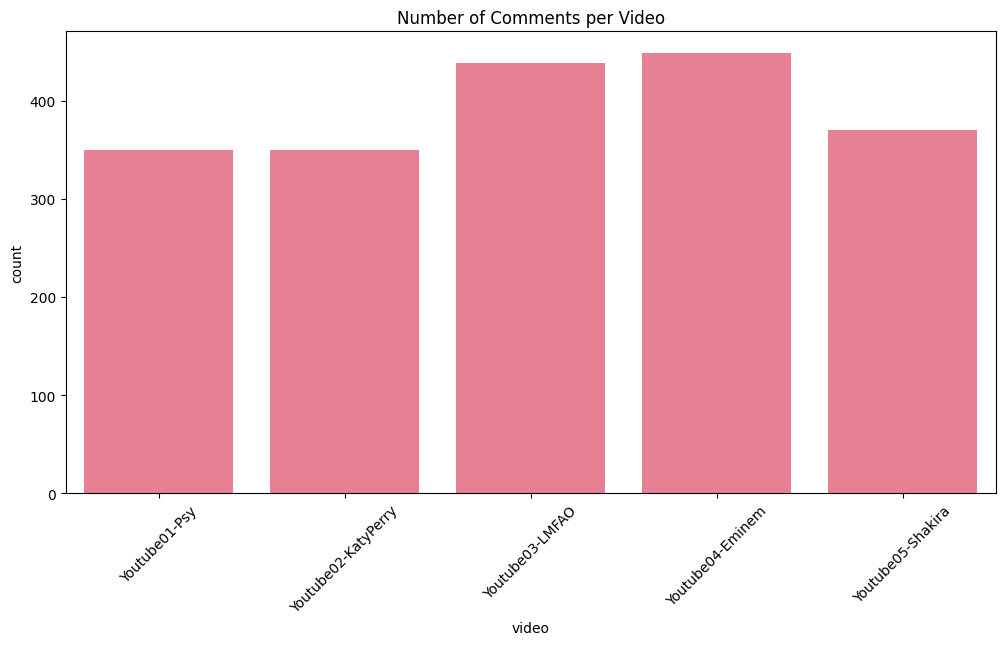

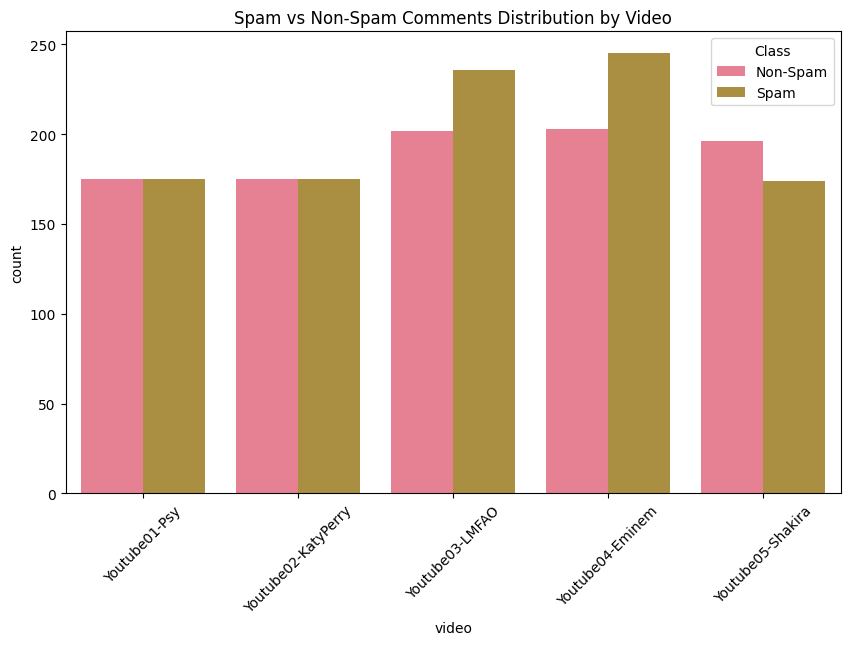

In [4]:
# Distribution across videos
plt.figure(figsize=(12, 6))
sns.countplot(data=youtube_df, x='video')
plt.title('Number of Comments per Video')
plt.xticks(rotation=45)
plt.show()

# Spam vs Non-spam distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=youtube_df, x='video', hue='CLASS')
plt.title('Spam vs Non-Spam Comments Distribution by Video')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Non-Spam', 'Spam'])
plt.show()

## 3. Text Analysis

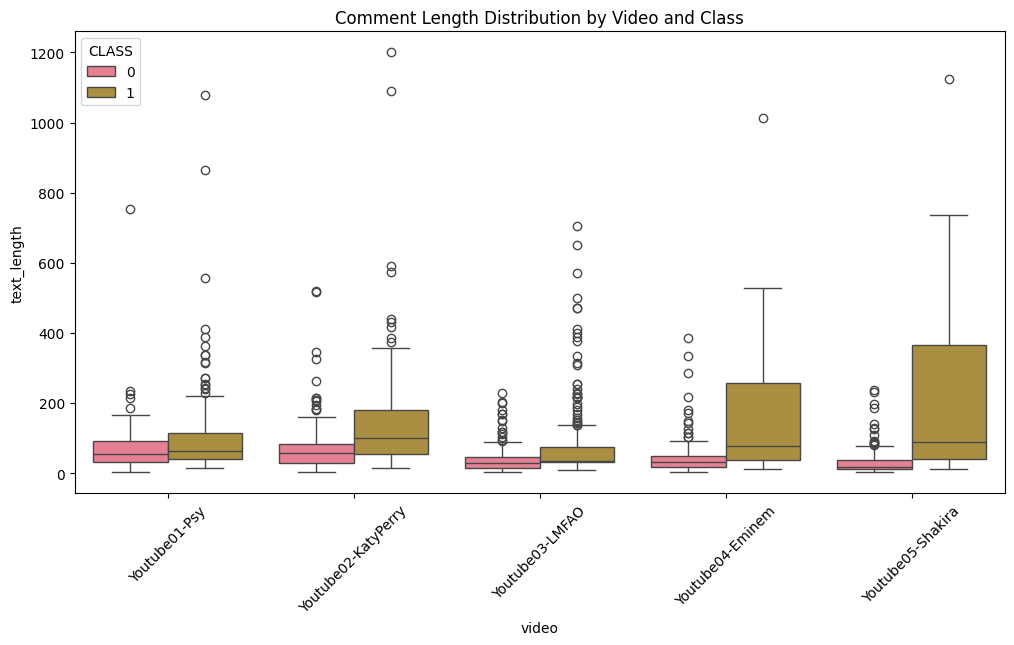


Text Length Statistics by Class:
        count        mean         std   min   25%   50%    75%     max
CLASS                                                                 
0       951.0   49.644585   56.284782   2.0  18.0  34.0   62.0   753.0
1      1005.0  137.336318  158.977404  10.0  36.0  65.0  171.0  1200.0


In [5]:
# Add text length
youtube_df['text_length'] = youtube_df['CONTENT'].str.len()

# Text length distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=youtube_df, x='video', y='text_length', hue='CLASS')
plt.title('Comment Length Distribution by Video and Class')
plt.xticks(rotation=45)
plt.show()

# Statistical summary of text length
print("\nText Length Statistics by Class:")
print(youtube_df.groupby('CLASS')['text_length'].describe())

## 4. Common Words Analysis

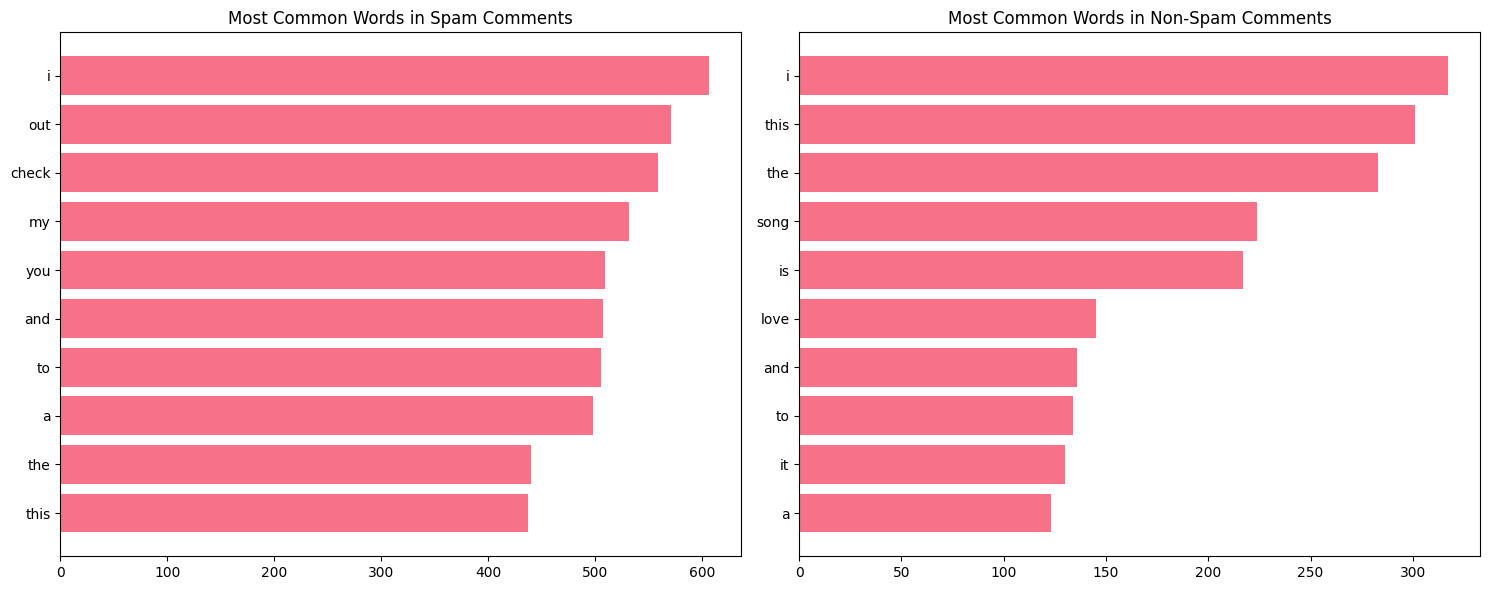

In [6]:
from collections import Counter
import re

def get_common_words(text_series, n=20):
    # Combine all text
    text = ' '.join(text_series.astype(str))
    # Convert to lowercase and split into words
    words = re.findall(r'\w+', text.lower())
    # Get most common words
    return Counter(words).most_common(n)

# Analyze common words in spam and non-spam comments
spam_words = get_common_words(youtube_df[youtube_df['CLASS'] == 1]['CONTENT'])
non_spam_words = get_common_words(youtube_df[youtube_df['CLASS'] == 0]['CONTENT'])

# Plot common words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Spam words
words, counts = zip(*spam_words)
ax1.barh(words[:10][::-1], counts[:10][::-1])
ax1.set_title('Most Common Words in Spam Comments')

# Non-spam words
words, counts = zip(*non_spam_words)
ax2.barh(words[:10][::-1], counts[:10][::-1])
ax2.set_title('Most Common Words in Non-Spam Comments')

plt.tight_layout()
plt.show()

In [8]:
relevant_data = youtube_df[['CONTENT', 'CLASS']]

In [9]:
# Create the processed directory if it doesn't exist
import os
os.makedirs('../datasets/processed', exist_ok=True)

In [12]:
# Save as CSV
relevant_data.to_csv('../datasets/processed/youtube_spam_relevant_data.csv', index=False)